# NBA Player Distance

In [1]:
import pandas as pd
from nba_api.stats.endpoints import leaguedashptstats

In [59]:
stats = leaguedashptstats.LeagueDashPtStats(
    per_mode_simple='Totals',
    player_or_team='Player',
    pt_measure_type='SpeedDistance'
)
df = stats.get_data_frames()[0]

In [64]:
marathon_dist = 26.219

df['DIST_MARATHONS'] = df.DIST_MILES / marathon_dist
df = df[df.DIST_MARATHONS > 1].sort_values(by='DIST_MILES', ascending=False)

In [42]:
df['MIN_PER_MARA'] = df.MIN / df.DIST_MARATHONS

In [62]:
df.sort_values(by="DIST_MILES_DEF", ascending=False)

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,DIST_FEET,DIST_MILES,DIST_MILES_OFF,DIST_MILES_DEF,AVG_SPEED,AVG_SPEED_OFF,AVG_SPEED_DEF
370,1628969,Mikal Bridges,1610612752,NYK,51,34,17,1955.0,796250,150.8,81.7,69.1,4.32,4.48,4.13
481,1641739,Toumani Camara,1610612757,POR,49,20,29,1575.0,678119,128.4,64.6,63.8,4.59,4.68,4.50
281,1628404,Josh Hart,1610612752,NYK,50,33,17,1879.0,732417,138.7,76.5,62.3,4.13,4.38,3.87
396,1628384,OG Anunoby,1610612752,NYK,49,32,17,1778.0,660904,125.2,65.0,60.2,3.94,3.93,3.96
301,1631099,Keegan Murray,1610612758,SAC,45,22,23,1585.0,659968,125.0,64.9,60.1,4.42,4.76,4.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,1630644,Mac McClung,1610612753,ORL,1,0,1,5.0,2144,0.4,0.2,0.2,4.42,4.59,4.27
45,1641752,Bobi Klintman,1610612765,DET,3,2,1,8.0,3138,0.6,0.4,0.2,4.26,4.75,3.53
18,1631214,Alondes Williams,1610612765,DET,1,0,1,4.0,1488,0.3,0.1,0.2,4.27,4.01,4.41
16,1642024,Alex Reese,1610612760,OKC,1,1,0,2.0,762,0.1,0.1,0.1,2.90,5.69,5.91


In [47]:
import matplotlib.pyplot as plt

<Axes: xlabel='AVG_SPEED_OFF', ylabel='AVG_SPEED_DEF'>

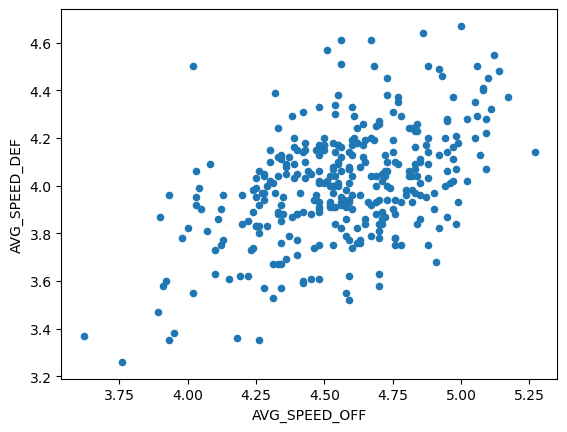

In [65]:
df.plot.scatter(x="AVG_SPEED_OFF", y="AVG_SPEED_DEF")

In [69]:
json_data = df[["PLAYER_NAME", "AVG_SPEED_OFF","AVG_SPEED_DEF"]].to_json(orient="records")

with open("speed_data.json", "w") as f:
  f.write(json_data)